# Section1 Project - Data Analysis

### ◎ Goal of project

  - 다음 분기에 어떤 게임을 설계해야 할까

### ◎ Keywords

  - Sprint 1:EDA, Feature Engineering, Data Manipulation, Data Visualization
  - Sprint 2:Hypothesis Test, CI, Bayesian, AB Test
  - Sprint 3:DR, PCA, Clustering, GD

### ◎ Required Contents
  - 지역에 따라서 선호하는 게임 장르가 다를까
  - 연도별 게임의 트렌드가 있을까
  - 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### ◎ Data Description
  - Name : 게임의 이름
  - Platform : 게임이 지원되는 플랫폼의 이름
  - Year : 게임이 출시된 연도
  - Genre : 게임의 장르
  - Publisher : 게임을 제작한 회사
  - NA_Sales : 북미지역에서의 출고량
  - EU_Sales : 유럽지역에서의 출고량
  - JP_Sales : 일본지역에서의 출고량
  - Other_Sales : 기타지역에서의 출고량



In [1]:
# 데이터 불러오기

import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# 데이터셋 크기 및 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [8]:
df_clean = df.copy()

In [9]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
index = 0
for it in df_clean['NA_Sales']:
    if it[-1] =="M":
        df_clean['NA_Sales'].iloc[index] = float(it[:-1])
    elif  it[-1] =="K":
        df_clean['NA_Sales'].iloc[index] = float(it[:-1])/(1000)
    else:
        df_clean['NA_Sales'].iloc[index] = float(it)
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [12]:
index = 0
for it in df_clean['EU_Sales']:
    if it[-1] =="M":
        df_clean['EU_Sales'].iloc[index] = float(it[:-1])
    elif  it[-1] =="K":
        df_clean['EU_Sales'].iloc[index] = float(it[:-1])/(1000)
    else:
        df_clean['EU_Sales'].iloc[index] = float(it)
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
index = 0
for it in df_clean['JP_Sales']:
    if it[-1] =="M":
        df_clean['JP_Sales'].iloc[index] = float(it[:-1])
    elif  it[-1] =="K":
        df_clean['JP_Sales'].iloc[index] = float(it[:-1])/(1000)
    else:
        df_clean['JP_Sales'].iloc[index] = float(it)
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
index = 0
for it in df_clean['Other_Sales']:
    if it[-1] =="M":
        df_clean['Other_Sales'].iloc[index] = float(it[:-1])
    elif  it[-1] =="K":
        df_clean['Other_Sales'].iloc[index] = float(it[:-1])/(1000)
    else:
        df_clean['Other_Sales'].iloc[index] = float(it)
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,0.02,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [17]:
df_clean[df_clean.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0


In [18]:
df_clean.drop_duplicates(inplace=True)

In [19]:
df_clean.reset_index(drop = True, inplace=True)

In [20]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,0.02,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.0,0.04


In [21]:
df_clean["ALL_Sales"] = df_clean['NA_Sales']+df_clean['EU_Sales']+df_clean['JP_Sales']+df_clean['Other_Sales']

In [22]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.0,0.0,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.0,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,0.02,0.0,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.0,0.0,0.0,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.0,0.04,0.25


In [23]:
# Year 컬럼 오류데이터 변환
index = 0
for it in df_clean['Year']:
    if it >=0 and it <17:
        df_clean['Year'].iloc[index] = int(it+2000)
    elif it >=17 and it < 100:
        df_clean['Year'].iloc[index] = int(it+1900)
    elif it >=100:
        df_clean['Year'].iloc[index] = int(it)
    else:
        df_clean['Year'].iloc[index] = it
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
# 연도를 기준으로 정렬
df_clean.sort_values(by=['Year'], inplace=True)

In [25]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
9225,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.0,0.27
5723,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05,4.31
14263,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
12313,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0.0,0.01,0.5
5938,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


In [26]:
df_clean.reset_index(drop=True, inplace=True)

In [27]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.0,0.27
1,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05,4.31
2,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
3,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0.0,0.01,0.5
4,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
16592,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.0,0.0,0.0,0.01
16593,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
16594,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0.0,0.0,0.05,0.75
16595,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.0,0.0,0.0,0.06


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
 9   ALL_Sales    16597 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [29]:
required1 = df_clean[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'ALL_Sales']]

In [30]:
required1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Misc,0.25,0.02,0.0,0.0,0.27
1,Shooter,4.0,0.26,0.0,0.05,4.31
2,Fighting,0.72,0.04,0.0,0.01,0.77
3,NaN,0.46,0.03,0.0,0.01,0.5
4,Misc,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...
16592,Racing,0.01,0.0,0.0,0.0,0.01
16593,Shooter,2.36,0.14,0.0,0.03,2.53
16594,Sports,0.7,0.0,0.0,0.05,0.75
16595,Misc,0.06,0.0,0.0,0.0,0.06


In [31]:
# 장르 결측치 제거
required1.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [32]:
required1.reset_index(drop=True, inplace=True)

In [33]:
required1.describe()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
count,16547,16547.0,16547.0,16547.0,16547.0,16547.00
unique,12,408.0,303.0,241.0,156.0,1007.00
top,Action,0.0,0.0,0.0,0.0,0.02
freq,3305,4489.0,5712.0,10421.0,6459.0,995.00


In [34]:
import numpy as np
required1.astype({"NA_Sales":np.float64, "EU_Sales":np.float64, "JP_Sales":np.float64, "Other_Sales":np.float64, "ALL_Sales":np.float64})

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Misc,0.25,0.02,0.0,0.00,0.27
1,Shooter,4.00,0.26,0.0,0.05,4.31
2,Fighting,0.72,0.04,0.0,0.01,0.77
3,Misc,1.07,0.07,0.0,0.01,1.15
4,Misc,0.99,0.05,0.0,0.01,1.05
...,...,...,...,...,...,...
16542,Racing,0.01,0.00,0.0,0.00,0.01
16543,Shooter,2.36,0.14,0.0,0.03,2.53
16544,Sports,0.70,0.00,0.0,0.05,0.75
16545,Misc,0.06,0.00,0.0,0.00,0.06


In [35]:
required1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16547 entries, 0 to 16546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        16547 non-null  object
 1   NA_Sales     16547 non-null  object
 2   EU_Sales     16547 non-null  object
 3   JP_Sales     16547 non-null  object
 4   Other_Sales  16547 non-null  object
 5   ALL_Sales    16547 non-null  object
dtypes: object(6)
memory usage: 775.8+ KB


In [36]:
NA_sum = pd.DataFrame(required1.groupby(['Genre'])['NA_Sales'].sum())

In [37]:
NA_sum

,NA_Sales
Genre,
Action,874.81
Adventure,105.66
Fighting,223.2
Misc,408.05
Platform,446.44
Puzzle,123.35
Racing,357.19
Role-Playing,319.54
Shooter,581.92


In [38]:
EU_sum = pd.DataFrame(required1.groupby(['Genre'])['EU_Sales'].sum())

In [39]:
EU_sum

,EU_Sales
Genre,
Action,522.16
Adventure,64.05
Fighting,101.22
Misc,212.36
Platform,201.61
Puzzle,50.73
Racing,237.1
Role-Playing,183.58
Shooter,313.05


In [40]:
JP_sum = pd.DataFrame(required1.groupby(['Genre'])['JP_Sales'].sum())

In [41]:
JP_sum

,JP_Sales
Genre,
Action,157.9
Adventure,51.95
Fighting,87.34
Misc,105.27
Platform,130.65
Puzzle,56.87
Racing,56.4
Role-Playing,344.95
Shooter,38.26


In [42]:
Other_sum = pd.DataFrame(required1.groupby(['Genre'])['Other_Sales'].sum())

In [43]:
Other_sum

,Other_Sales
Genre,
Action,186.45
Adventure,16.81
Fighting,36.64
Misc,74.04
Platform,51.53
Puzzle,12.52
Racing,77.1
Role-Playing,56.96
Shooter,102.65


In [44]:
ALL_sum = pd.DataFrame(required1.groupby(['Genre'])['ALL_Sales'].sum())
ALL_sum

,ALL_Sales
Genre,
Action,1741.32
Adventure,238.47
Fighting,448.4
Misc,799.72
Platform,830.23
Puzzle,243.47
Racing,727.79
Role-Playing,905.03
Shooter,1035.88


In [45]:
# required1 데이터 정제 완료
required1_clean = pd.concat([NA_sum, EU_sum, JP_sum, Other_sum, ALL_sum], axis=1)

## ◎ 지역에 따른 게임 장르 선호도 차이

In [46]:
required1_clean

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
Genre,,,,,
Action,874.81,522.16,157.9,186.45,1741.32
Adventure,105.66,64.05,51.95,16.81,238.47
Fighting,223.2,101.22,87.34,36.64,448.4
Misc,408.05,212.36,105.27,74.04,799.72
Platform,446.44,201.61,130.65,51.53,830.23
Puzzle,123.35,50.73,56.87,12.52,243.47
Racing,357.19,237.1,56.4,77.1,727.79
Role-Playing,319.54,183.58,344.95,56.96,905.03
Shooter,581.92,313.05,38.26,102.65,1035.88


<function matplotlib.pyplot.show>

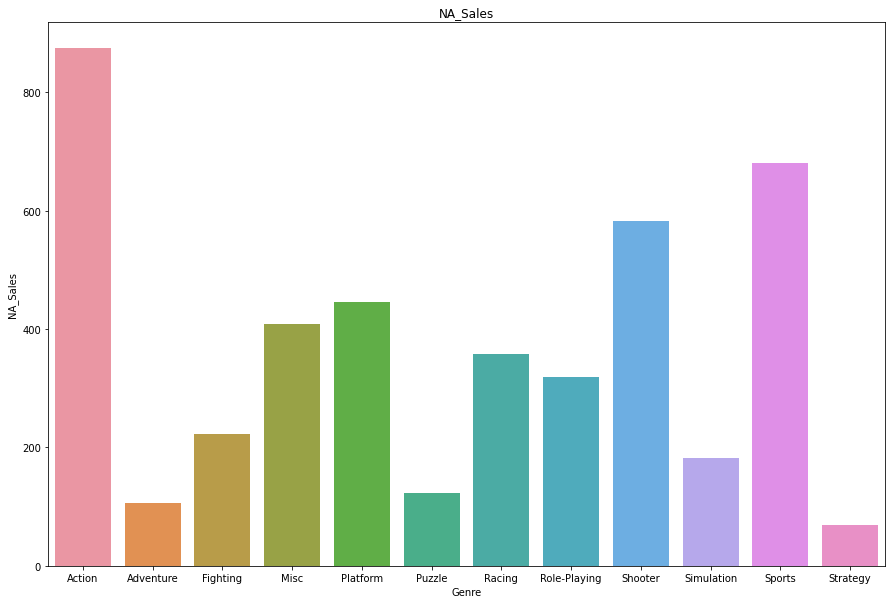

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.barplot(x=required1_clean.index, y=required1_clean['NA_Sales'])
plt.title('NA_Sales')
plt.show

<function matplotlib.pyplot.show>

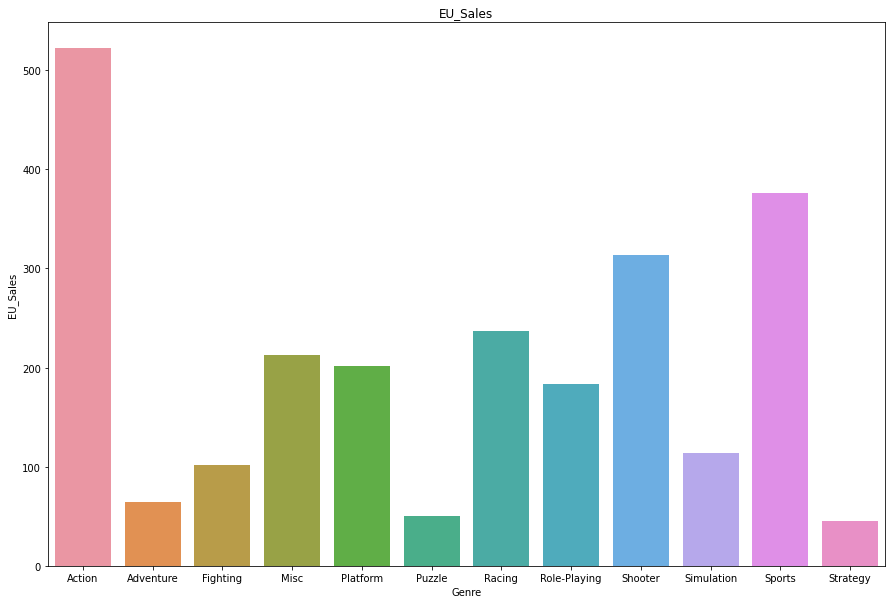

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x=required1_clean.index, y=required1_clean['EU_Sales'])
plt.title('EU_Sales')
plt.show

<function matplotlib.pyplot.show>

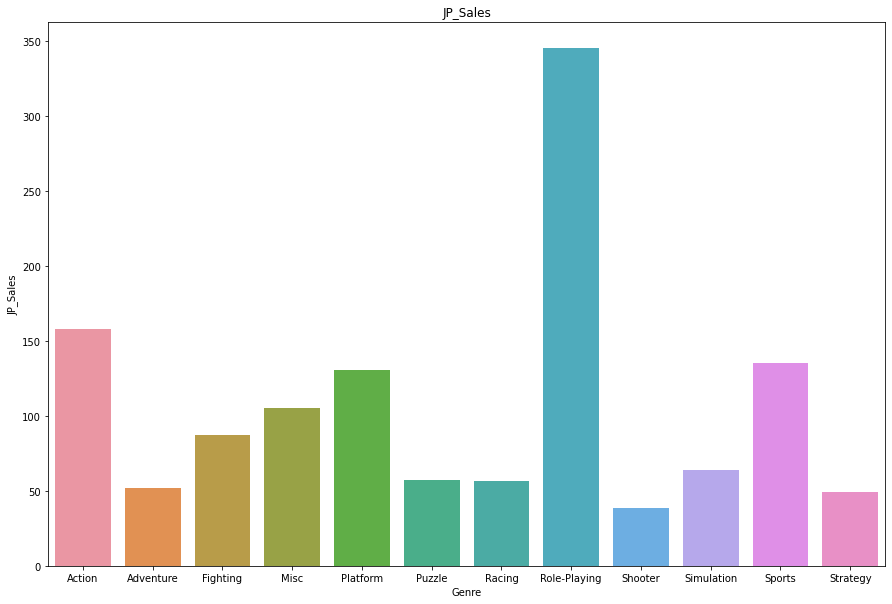

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(x=required1_clean.index, y=required1_clean['JP_Sales'])
plt.title('JP_Sales')
plt.show

<function matplotlib.pyplot.show>

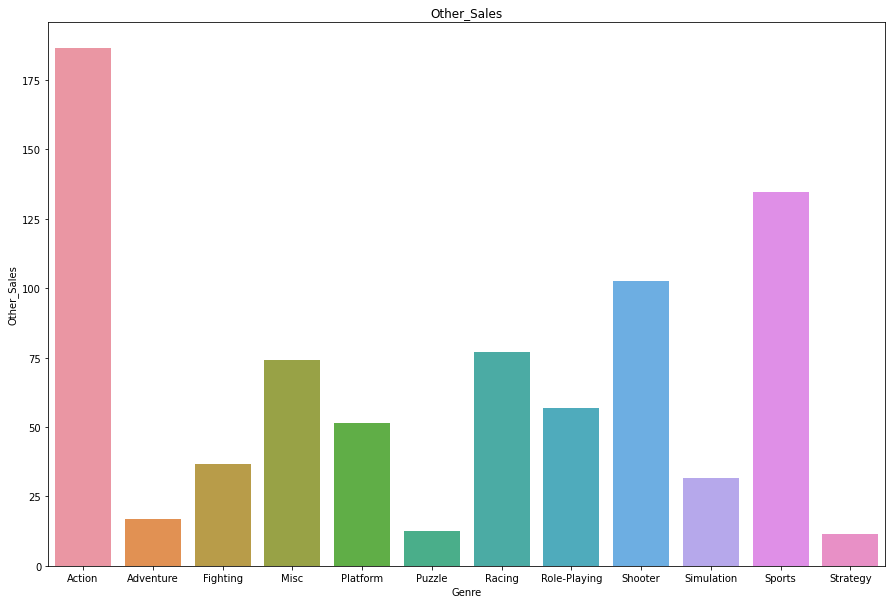

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x=required1_clean.index, y=required1_clean['Other_Sales'])
plt.title('Other_Sales')
plt.show

<function matplotlib.pyplot.show>

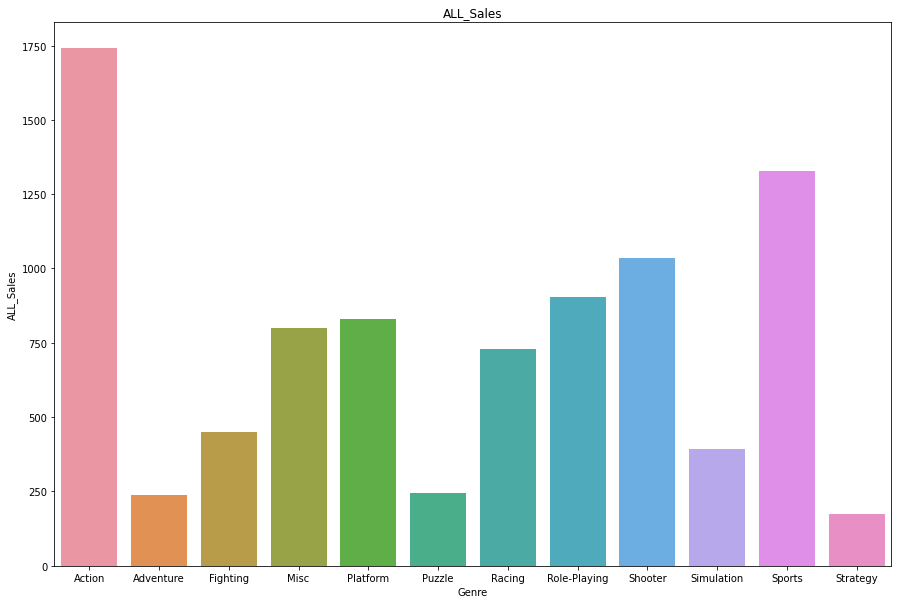

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(x=required1_clean.index, y=required1_clean['ALL_Sales'])
plt.title('ALL_Sales')
plt.show

## ◎ 연도별 게임 선호도 차이

In [52]:
# 데이터 정제
required2 = df_clean.dropna(axis=0)

In [53]:
required2.reset_index(drop=True, inplace=True)

In [54]:
required2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
 9   ALL_Sales    16241 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [55]:
required2.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
ALL_Sales      0
dtype: int64

In [56]:
required2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.0,0.27
1,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05,4.31
2,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
3,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
4,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05


In [57]:
required2_clean = required2[['Year', 'Genre']]

In [58]:
required2_clean

,Year,Genre
0,1980.0,Misc
1,1980.0,Shooter
2,1980.0,Fighting
3,1980.0,Misc
4,1980.0,Misc
...,...,...
16236,2016.0,Action
16237,2017.0,Role-Playing
16238,2017.0,Action
16239,2017.0,Role-Playing


In [59]:
required2_clean['Year'].count()

16241

In [60]:
re2 = pd.DataFrame(required2_clean.groupby(['Year'])['Genre'].value_counts())

In [61]:
re2

Genre
Year   Genre              
1980.0 Misc              4
       Shooter           2
       Action            1
       Fighting          1
1981.0 Action           25
...                    ...
2016.0 Strategy         10
       Simulation        9
2017.0 Role-Playing      2
       Action            1
2020.0 Simulation        1

[388 rows x 1 columns]

In [62]:
re2_new = pd.DataFrame(re2.groupby(['Year'])['Genre'].idxmax())

In [63]:
# 연도별 가장 많이 출시된 게임 장르
re2_new

,Genre
Year,
1980.0,"(1980.0, Misc)"
1981.0,"(1981.0, Action)"
1982.0,"(1982.0, Action)"
1983.0,"(1983.0, Action)"
1984.0,"(1984.0, Puzzle)"
1985.0,"(1985.0, Platform)"
1986.0,"(1986.0, Action)"
1987.0,"(1987.0, Sports)"
1988.0,"(1988.0, Platform)"


In [64]:
re2_sec = required2[['Year', 'Genre', 'ALL_Sales']]

In [65]:
re2_sec

,Year,Genre,ALL_Sales
0,1980.0,Misc,0.27
1,1980.0,Shooter,4.31
2,1980.0,Fighting,0.77
3,1980.0,Misc,1.15
4,1980.0,Misc,1.05
...,...,...,...
16236,2016.0,Action,0.07
16237,2017.0,Role-Playing,0.01
16238,2017.0,Action,0.01
16239,2017.0,Role-Playing,0.03


In [66]:
re2_max = pd.DataFrame(re2_sec.groupby(['Year','Genre'])['ALL_Sales'].sum())

In [67]:
re2_max

ALL_Sales
Year   Genre                 
1980.0 Action            0.34
       Fighting          0.77
       Misc               2.7
       Shooter           7.07
1981.0 Action           14.79
...                       ...
2016.0 Sports           14.63
       Strategy          0.52
2017.0 Action            0.01
       Role-Playing      0.04
2020.0 Simulation        0.29

[388 rows x 1 columns]

In [170]:
re2_set = re2_max.reset_index()

In [171]:
re2_set

,Year,Genre,ALL_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.70
3,1980.0,Shooter,7.07
4,1981.0,Action,14.79
...,...,...,...
383,2016.0,Sports,14.63
384,2016.0,Strategy,0.52
385,2017.0,Action,0.01
386,2017.0,Role-Playing,0.04


In [172]:
re2_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       388 non-null    float64
 1   Genre      388 non-null    object 
 2   ALL_Sales  388 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.2+ KB


In [173]:
re2_set1 = re2_set.copy()

In [174]:
re2_set1['Year'] = re2_set1['Year'].astype('category')

In [175]:
re2_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       388 non-null    category
 1   Genre      388 non-null    object  
 2   ALL_Sales  388 non-null    float64 
dtypes: category(1), float64(1), object(1)
memory usage: 7.9+ KB


In [176]:
re2_re = pd.DataFrame(re2_set1.groupby(['Year'])['ALL_Sales'].max())
re2_re

,ALL_Sales
Year,
1980.0,7.07
1981.0,14.79
1982.0,10.04
1983.0,6.93
1984.0,31.10
1985.0,43.17
1986.0,13.74
1987.0,5.42
1988.0,27.73


In [185]:
re2_set2 = re2_max.groupby(['Year']).idxmax()
re2_set2.rename(columns = {'ALL_Sales':'Genre'}, inplace=True)
re2_set2

,Genre
Year,
1980.0,"(1980.0, Shooter)"
1981.0,"(1981.0, Action)"
1982.0,"(1982.0, Puzzle)"
1983.0,"(1983.0, Platform)"
1984.0,"(1984.0, Shooter)"
1985.0,"(1985.0, Platform)"
1986.0,"(1986.0, Action)"
1987.0,"(1987.0, Fighting)"
1988.0,"(1988.0, Platform)"


In [186]:
re2_result = re2_re.join(re2_set2, how="left")

In [187]:
re2_result

,ALL_Sales,Genre
Year,,
1980.0,7.07,"(1980.0, Shooter)"
1981.0,14.79,"(1981.0, Action)"
1982.0,10.04,"(1982.0, Puzzle)"
1983.0,6.93,"(1983.0, Platform)"
1984.0,31.10,"(1984.0, Shooter)"
1985.0,43.17,"(1985.0, Platform)"
1986.0,13.74,"(1986.0, Action)"
1987.0,5.42,"(1987.0, Fighting)"
1988.0,27.73,"(1988.0, Platform)"


In [190]:
re2_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1980.0 to 2020.0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ALL_Sales  39 non-null     float64
 1   Genre      39 non-null     object 
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [198]:
re2_result2 = re2_result.reset_index()
re2_result2

,Year,ALL_Sales,Genre
0,1980.0,7.07,"(1980.0, Shooter)"
1,1981.0,14.79,"(1981.0, Action)"
2,1982.0,10.04,"(1982.0, Puzzle)"
3,1983.0,6.93,"(1983.0, Platform)"
4,1984.0,31.10,"(1984.0, Shooter)"
5,1985.0,43.17,"(1985.0, Platform)"
6,1986.0,13.74,"(1986.0, Action)"
7,1987.0,5.42,"(1987.0, Fighting)"
8,1988.0,27.73,"(1988.0, Platform)"
9,1989.0,37.75,"(1989.0, Puzzle)"


## ◎ 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [244]:
# 총 출고량이 평균 이상인 게임 데이터 출력
required3 = required2[required2['ALL_Sales'].mean()<=required2['ALL_Sales']]

In [246]:
required3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
1,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05,4.31
2,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
3,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
4,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
...,...,...,...,...,...,...,...,...,...,...
16177,Madden NFL 17,XOne,2016.0,Sports,Electronic Arts,0.72,0.02,0.0,0.09,0.83
16183,LEGO Marvel's Avengers,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.25,0.29,0.0,0.1,0.64
16199,Far Cry: Primal,XOne,2016.0,Action,Ubisoft,0.46,0.32,0.0,0.07,0.85
16208,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78


In [247]:
required3.reset_index(drop=True, inplace=True)
required3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05,4.31
1,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
2,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
...,...,...,...,...,...,...,...,...,...,...
3672,Madden NFL 17,XOne,2016.0,Sports,Electronic Arts,0.72,0.02,0.0,0.09,0.83
3673,LEGO Marvel's Avengers,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.25,0.29,0.0,0.1,0.64
3674,Far Cry: Primal,XOne,2016.0,Action,Ubisoft,0.46,0.32,0.0,0.07,0.85
3675,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78


In [251]:
required3_sum = pd.DataFrame(required3.groupby(['Genre'])['ALL_Sales'].sum())

In [252]:
required3_sum

,ALL_Sales
Genre,
Action,1293.86
Adventure,122.36
Fighting,338.34
Misc,563.82
Platform,729.09
Puzzle,183.38
Racing,573.51
Role-Playing,731.48
Shooter,882.35


In [253]:
# 평균이상 출고량 게임의 총출고량에 대한 장르별 평균이상 출고량 장르의 비율
# 1980년대부터 2016년까지의 게임 데이터
required3_sumx = required3_sum['ALL_Sales'].sum()

In [263]:
required3_sumx

6799.870000000001

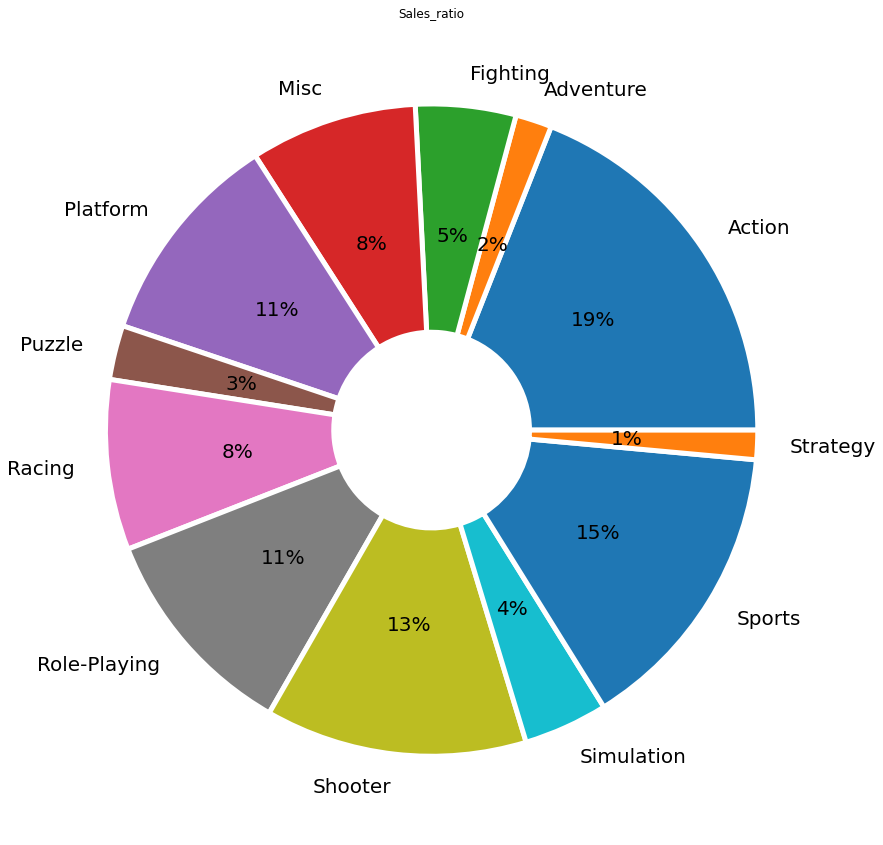

In [272]:
plt.figure(figsize=(20,15))
ratio = required3_sum['ALL_Sales']/required3_sumx
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=required3_sum.index, autopct='%.0f%%', textprops=({'size':20}), wedgeprops=wedgeprops)
plt.title('Sales_ratio');

In [275]:
required3_sum.ALL_Sales.sort_values(ascending=False)

Genre
Action          1293.86
Sports           998.75
Shooter          882.35
Role-Playing     731.48
Platform         729.09
Racing           573.51
Misc             563.82
Fighting         338.34
Simulation       284.08
Puzzle           183.38
Adventure        122.36
Strategy          98.85
Name: ALL_Sales, dtype: object

In [276]:
required3_1 = required3_sum[required3_sum['ALL_Sales'].mean()<=required3_sum['ALL_Sales']]

In [281]:
required3_1.sort_values(by='ALL_Sales', ascending=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [282]:
required3_1

,ALL_Sales
Genre,
Action,1293.86
Sports,998.75
Shooter,882.35
Role-Playing,731.48
Platform,729.09
Racing,573.51


### - 1980년도부터 2016년까지 평균 출고량 이상의 게임 장르 중, 가장 많은 비율을 차지하는 상위 6개의 장르 : Action, Sports, Shooter, Role-Playing, Platform, Racing

In [283]:
# 평균 출고량 이상의 데이터 갯수 파악
required3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         3677 non-null   object 
 1   Platform     3677 non-null   object 
 2   Year         3677 non-null   float64
 3   Genre        3677 non-null   object 
 4   Publisher    3677 non-null   object 
 5   NA_Sales     3677 non-null   object 
 6   EU_Sales     3677 non-null   object 
 7   JP_Sales     3677 non-null   object 
 8   Other_Sales  3677 non-null   object 
 9   ALL_Sales    3677 non-null   object 
dtypes: float64(1), object(9)
memory usage: 287.4+ KB


In [284]:
# 2000년을 기준으로 이전 장르별 판매량과 이후 장르별 판매량의 차이
required3_1900 = required3[required3['Year']<2000]

In [285]:
required3_2000 = required3[required3['Year']>=2000]

In [286]:
required3_1900

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05,4.31
1,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
2,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
...,...,...,...,...,...,...,...,...,...,...
656,Beetle Adventure Racing!,N64,1999.0,Racing,Electronic Arts,0.4,0.2,0.0,0.02,0.62
657,Doko Demo Issyo,PS,1999.0,Misc,Sony Computer Entertainment,0.0,0.0,1.0,0.07,1.07
658,Need For Speed: High Stakes,PS,1999.0,Racing,Electronic Arts,1.58,0.64,0.0,0.09,2.31
659,Tom Clancy's Rainbow Six,PS,1999.0,Shooter,Red Storm Entertainment,0.93,0.63,0.0,0.08,1.64


In [287]:
required3_2000

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
661,NCAA Football 2001,PS,2000.0,Sports,Electronic Arts,0.39,0.26,0.0,0.05,0.7
662,Contender 2,PS,2000.0,Fighting,3DO,0.31,0.21,0.0,0.04,0.56
663,Command & Conquer: Red Alert 2,PC,2000.0,Strategy,Electronic Arts,1.32,0.02,0.0,0.0,1.34
664,Jampack Winter 2000,PS,2000.0,Misc,Sony Computer Entertainment,0.55,0.38,0.0,0.07,1.0
665,MLB 2001,PS,2000.0,Sports,Sony Computer Entertainment,0.49,0.34,0.0,0.06,0.89
...,...,...,...,...,...,...,...,...,...,...
3672,Madden NFL 17,XOne,2016.0,Sports,Electronic Arts,0.72,0.02,0.0,0.09,0.83
3673,LEGO Marvel's Avengers,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.25,0.29,0.0,0.1,0.64
3674,Far Cry: Primal,XOne,2016.0,Action,Ubisoft,0.46,0.32,0.0,0.07,0.85
3675,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78


In [288]:
# 1900년대 게임데이터로 장르별 출고량의 합을 구한다.
required3_1900_sum = pd.DataFrame(required3_1900.groupby(['Genre'])['ALL_Sales'].sum())

In [291]:
required3_1900_sum

,ALL_Sales
Genre,
Action,157.04
Adventure,37.93
Fighting,105.3
Misc,57.21
Platform,318.41
Puzzle,91.82
Racing,136.87
Role-Playing,176.16
Shooter,108.11


In [289]:
# 2000년대 게임데이터로 장르별 출고량의 합을 구한다.
required3_2000_sum = pd.DataFrame(required3_2000.groupby(['Genre'])['ALL_Sales'].sum())

In [292]:
required3_2000_sum

,ALL_Sales
Genre,
Action,1136.82
Adventure,84.43
Fighting,233.04
Misc,506.61
Platform,410.68
Puzzle,91.56
Racing,436.64
Role-Playing,555.32
Shooter,774.24


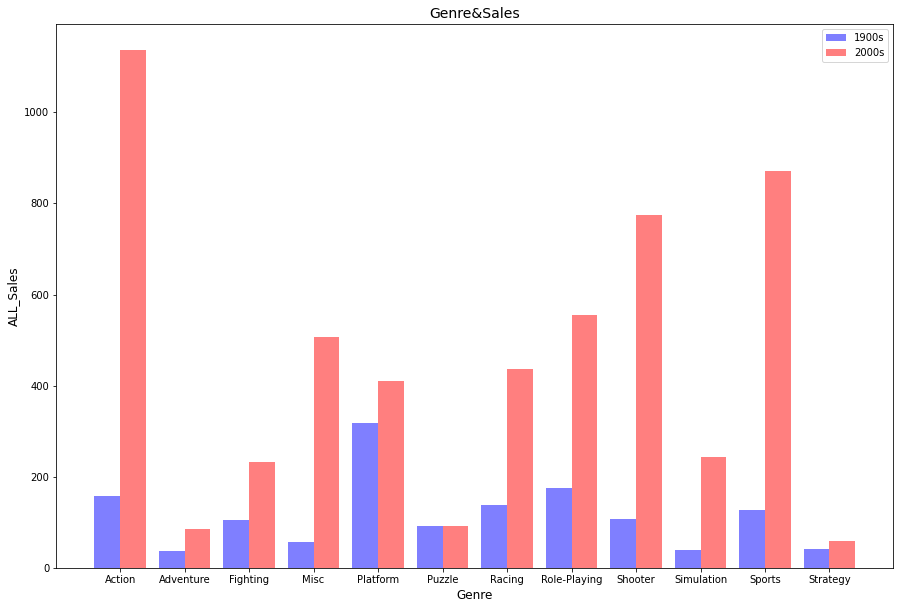

In [346]:
plt.figure(figsize=(15,10))

a1 = np.arange(len(required3_sum.index))
plt.bar(a1 -0.2, required3_1900_sum['1900s'],color = 'b',alpha = 0.5, width=0.4, label='1900s')
plt.bar(a1 +0.2, required3_2000_sum['2000s'],color = 'r',alpha = 0.5, width=0.4, label='2000s')
plt.xticks(a1, required3_sum.index)
plt.title('Genre&Sales', size=14)
plt.xlabel('Genre', size=12)
plt.ylabel('ALL_Sales', size=12)
plt.legend()
plt.show();

In [332]:
required3_1900.shape, required3_2000.shape

((661, 10), (3016, 10))

### 2010~2016년 데이터 추출


In [334]:
required3_2010 = required3[required3['Year']>=2010]

In [335]:
required3_2010

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
2623,Assassin's Creed II,PC,2010.0,Action,Ubisoft,0.01,0.45,0.0,0.11,0.57
2624,ZhuZhu Pets 2: Featuring The Wild Bunch,DS,2010.0,Simulation,Activision,0.41,0.11,0.0,0.04,0.56
2625,Sonic & Sega All-Stars Racing,PS3,2010.0,Racing,Sega,0.36,0.46,0.0,0.17,0.99
2626,BioShock 2,X360,2010.0,Shooter,Take-Two Interactive,1.45,0.55,0.02,0.19,2.21
2627,Fist of the North Star: Ken's Rage,PS3,2010.0,Action,Ubisoft Annecy,0.06,0.03,0.55,0.02,0.66
...,...,...,...,...,...,...,...,...,...,...
3672,Madden NFL 17,XOne,2016.0,Sports,Electronic Arts,0.72,0.02,0.0,0.09,0.83
3673,LEGO Marvel's Avengers,PS4,2016.0,Action,Warner Bros. Interactive Entertainment,0.25,0.29,0.0,0.1,0.64
3674,Far Cry: Primal,XOne,2016.0,Action,Ubisoft,0.46,0.32,0.0,0.07,0.85
3675,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78


In [336]:
required3_2010.reset_index(drop=True, inplace=True)

### 2005~2010년 데이터 추출

In [337]:
required3_2005 = required3_2000[required3_2000['Year']>=2005]

In [338]:
required3_2005 = required3_2005[required3_2005['Year']<2010]

In [339]:
required3_2005

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
1439,The Sims 2: Nightlife,PC,2005.0,Simulation,Electronic Arts,1.22,0.05,0.0,0.0,1.27
1440,Tom Clancy's Splinter Cell: Chaos Theory,XB,2005.0,Action,Ubisoft,0.68,0.38,0.0,0.05,1.11
1441,The Sims 2,DS,2005.0,Simulation,Electronic Arts,0.82,0.07,0.0,0.07,0.96
1442,Twisted Metal: Head On,PSP,2005.0,Action,Sony Computer Entertainment,0.71,0.0,0.0,0.06,0.77
1443,Pokemon Mystery Dungeon: Red/Blue Rescue Team,GBA,2005.0,Role-Playing,Nintendo,0.71,0.52,0.74,0.08,2.05
...,...,...,...,...,...,...,...,...,...,...
2618,Pro Evolution Soccer 2010,PS2,2009.0,Sports,Konami Digital Entertainment,0.1,0.18,0.12,1.16,1.56
2619,Tony Hawk: RIDE,X360,2009.0,Sports,Activision,0.46,0.1,0.0,0.05,0.61
2620,Pro Evolution Soccer 2010,PSP,2009.0,Sports,Konami Digital Entertainment,0.09,0.33,0.2,0.18,0.8
2621,Tiger Woods PGA Tour 10,PS3,2009.0,Sports,Electronic Arts,0.42,0.25,0.0,0.12,0.79


In [340]:
required3_2005.reset_index(drop=True,inplace=True)
required3_2005

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,The Sims 2: Nightlife,PC,2005.0,Simulation,Electronic Arts,1.22,0.05,0.0,0.0,1.27
1,Tom Clancy's Splinter Cell: Chaos Theory,XB,2005.0,Action,Ubisoft,0.68,0.38,0.0,0.05,1.11
2,The Sims 2,DS,2005.0,Simulation,Electronic Arts,0.82,0.07,0.0,0.07,0.96
3,Twisted Metal: Head On,PSP,2005.0,Action,Sony Computer Entertainment,0.71,0.0,0.0,0.06,0.77
4,Pokemon Mystery Dungeon: Red/Blue Rescue Team,GBA,2005.0,Role-Playing,Nintendo,0.71,0.52,0.74,0.08,2.05
...,...,...,...,...,...,...,...,...,...,...
1179,Pro Evolution Soccer 2010,PS2,2009.0,Sports,Konami Digital Entertainment,0.1,0.18,0.12,1.16,1.56
1180,Tony Hawk: RIDE,X360,2009.0,Sports,Activision,0.46,0.1,0.0,0.05,0.61
1181,Pro Evolution Soccer 2010,PSP,2009.0,Sports,Konami Digital Entertainment,0.09,0.33,0.2,0.18,0.8
1182,Tiger Woods PGA Tour 10,PS3,2009.0,Sports,Electronic Arts,0.42,0.25,0.0,0.12,0.79


### 2005~2010년 데이터 합계 계산

In [342]:
required3_2005_sum = pd.DataFrame(required3_2005.groupby(['Genre'])['ALL_Sales'].sum())
required3_2005_sum

,ALL_Sales
Genre,
Action,383.52
Adventure,43.51
Fighting,96.41
Misc,286.04
Platform,149.29
Puzzle,60.07
Racing,183.93
Role-Playing,172.77
Shooter,233.7


### 2010~2016년 데이터 합계 계산

In [343]:
required3_2010_sum = pd.DataFrame(required3_2010.groupby(['Genre'])['ALL_Sales'].sum())
required3_2010_sum

,ALL_Sales
Genre,
Action,500.81
Adventure,25.72
Fighting,57.61
Misc,156.75
Platform,106.04
Puzzle,12.18
Racing,97.45
Role-Playing,231.39
Shooter,420.16


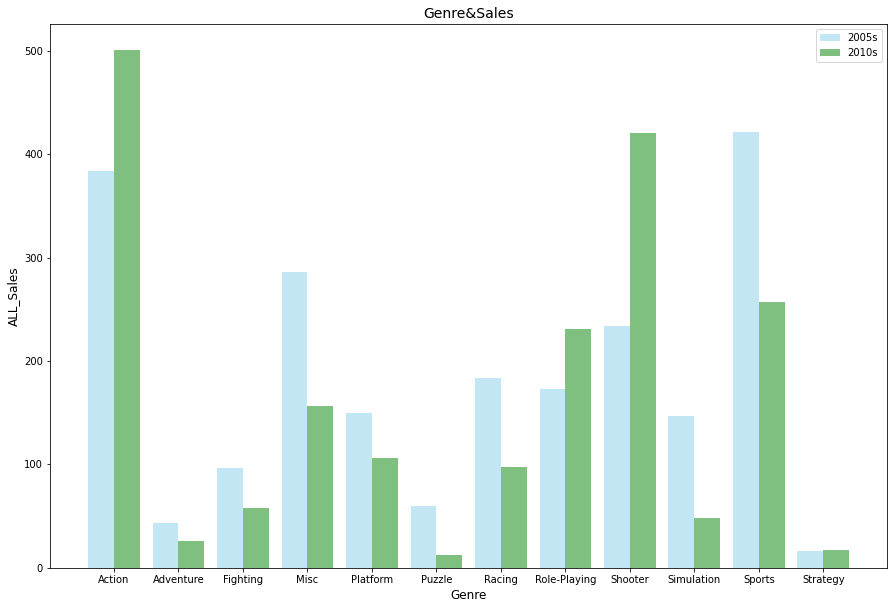

In [347]:
plt.figure(figsize=(15,10))

a1 = np.arange(len(required3_sum.index))
plt.bar(a1 -0.2, required3_2005_sum['ALL_Sales'],color = 'skyblue',alpha = 0.5, width=0.4, label='2005s')
plt.bar(a1 +0.2, required3_2010_sum['ALL_Sales'],color = 'green',alpha = 0.5, width=0.4, label='2010s')
plt.xticks(a1, required3_sum.index)
plt.title('Genre&Sales', size=14)
plt.xlabel('Genre', size=12)
plt.ylabel('ALL_Sales', size=12)
plt.legend()
plt.show();

### 최근 10년동안의 데이터로 살펴본 결과 2005~2010년동안 출고량 대비,
### 2010~2016년 사이의 'Action', 'Shooter', 'Role-Playing' 장르의 출고량이 상승함.

In [356]:
# 출고량이 상승한 세 데이터의 상승한 량 계산
Action = required3_2010_sum.iloc[0] - required3_2005_sum.iloc[0]

In [357]:
Role = required3_2010_sum.iloc[7] - required3_2005_sum.iloc[7]

In [359]:
Shooter = required3_2010_sum.iloc[8] - required3_2005_sum.iloc[8]

In [360]:
Genre1 = ['Action', 'Role-Playing', 'Shooter']

In [361]:
Sales_up1 = pd.DataFrame([Genre1])

In [364]:
Sales_up1 = Sales_up1.T

In [396]:
Sales_up2 = pd.DataFrame([Action, Role, Shooter])

In [397]:
Sales_up2.reset_index(drop=True, inplace=True)

In [398]:
Sales_up2

,ALL_Sales
0,117.29
1,58.62
2,186.46


In [399]:
Sales_up = Sales_up1.join(Sales_up2, how="left")

In [400]:
Sales_up.rename(columns = {0:'Genre', 1:'Salesup'}, inplace=True)

In [401]:
Sales_up

,Genre,ALL_Sales
0,Action,117.29
1,Role-Playing,58.62
2,Shooter,186.46


In [402]:
Sales_up.set_index('Genre', inplace=True)

In [403]:
Sales_up

,ALL_Sales
Genre,
Action,117.29
Role-Playing,58.62
Shooter,186.46


### 최근 3년 이내의 출고 증가량


In [415]:
required3_2014 = required3_2010[required3_2010['Year']>=2014]

In [439]:
required3_2014_sum = pd.DataFrame(required3_2014.groupby(['Genre'])['ALL_Sales'].sum())

In [440]:
required3_2014_sum

,ALL_Sales
Genre,
Action,130.44
Adventure,5.75
Fighting,20.91
Misc,24.68
Platform,13.96
Puzzle,1.2
Racing,20.05
Role-Playing,69.2
Shooter,138.42


In [441]:
required3_2014_sum.reset_index(inplace=True)
required3_2014_sum

,Genre,ALL_Sales
0,Action,130.44
1,Adventure,5.75
2,Fighting,20.91
3,Misc,24.68
4,Platform,13.96
5,Puzzle,1.2
6,Racing,20.05
7,Role-Playing,69.2
8,Shooter,138.42
9,Simulation,7.18


In [450]:
required3_2014_st = pd.DataFrame({'Genre':['Strategy'], 'ALL_Sales':[0]})

In [451]:
required3_2014_st

,Genre,ALL_Sales
0,Strategy,0


In [452]:
required3_2014_sum = pd.concat([required3_2014_sum, required3_2014_st], axis=0, join="inner")

In [453]:
required3_2014_sum

,Genre,ALL_Sales
0,Action,130.44
1,Adventure,5.75
2,Fighting,20.91
3,Misc,24.68
4,Platform,13.96
5,Puzzle,1.2
6,Racing,20.05
7,Role-Playing,69.2
8,Shooter,138.42
9,Simulation,7.18


In [454]:
required3_2014_sum.set_index('Genre', inplace=True)

In [464]:
required3_2011 = required3_2010[required3_2010['Year']<2013]

In [465]:
required3_2011_sum = pd.DataFrame(required3_2011.groupby(['Genre'])['ALL_Sales'].sum())

In [466]:
required3_2011_sum

,ALL_Sales
Genre,
Action,261.96
Adventure,16.5
Fighting,31.63
Misc,111.3
Platform,71.01
Puzzle,10.19
Racing,66.11
Role-Playing,140.47
Shooter,224.72


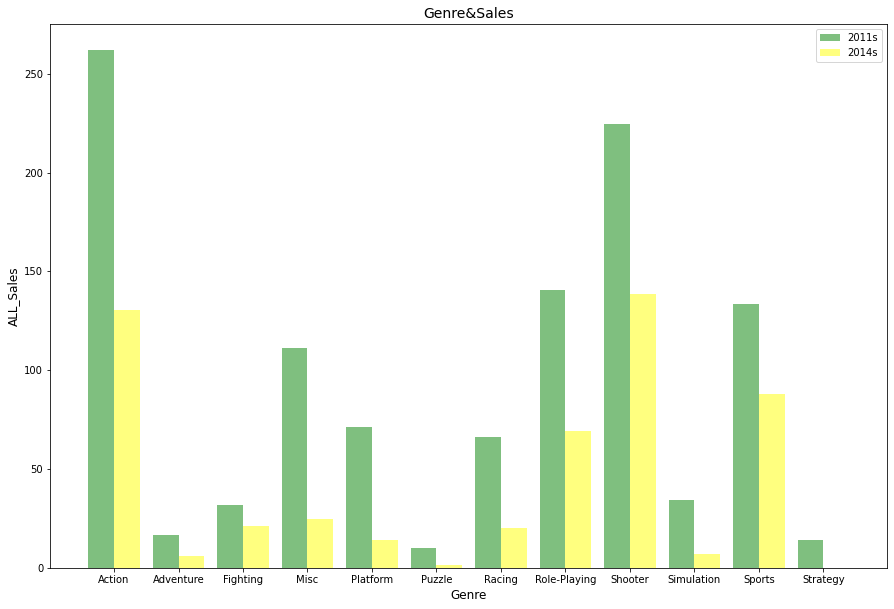

In [467]:
plt.figure(figsize=(15,10))

a1 = np.arange(len(required3_sum.index))
plt.bar(a1 -0.2, required3_2011_sum['ALL_Sales'],color = 'green',alpha = 0.5, width=0.4, label='2011s')
plt.bar(a1 +0.2, required3_2014_sum['ALL_Sales'],color = 'yellow',alpha = 0.5, width=0.4, label='2014s')
plt.xticks(a1, required3_sum.index)
plt.title('Genre&Sales', size=14)
plt.xlabel('Genre', size=12)
plt.ylabel('ALL_Sales', size=12)
plt.legend()
plt.show();

### 최근 2010~2013년 까지의 출고량에 비해 최근 게임산업의 전체적인 출고량은 감소한 폭이지만 여전히 'Action', 'Shooter'장르에서 많은 출고량을 보이고 있다.